In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [120]:
tit = pd.read_csv('TITANIC.csv')

In [121]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


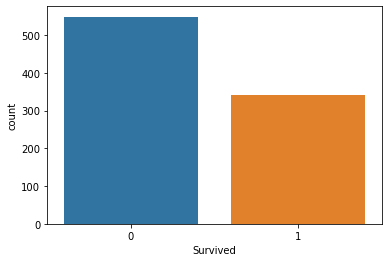

In [124]:
sns.countplot(x='Survived',data=tit)

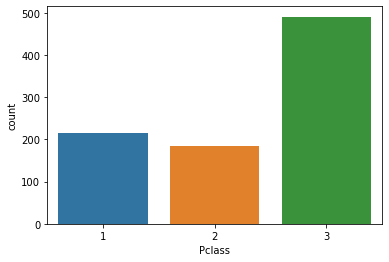

In [125]:
sns.countplot(x='Pclass',data=tit)

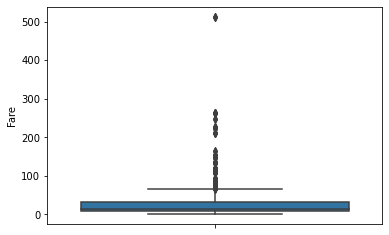

In [126]:
sns.boxplot(y='Fare',data=tit)

In [127]:
##Bivariate analysis

In [128]:
counts = tit.groupby(['Sex','Pclass'],axis = 0)
counts.size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [129]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
tit['Embarked']=tit['Embarked'].fillna(value='S')
## Mode is S as we know 

In [131]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [132]:
etit = tit.drop(['Cabin'], axis=1)
etit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [133]:
etit['Age']=etit['Age'].fillna(value='28')

In [134]:
etit['Age'].describe()

count     891
unique     89
top        28
freq      177
Name: Age, dtype: object

In [135]:
etit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [136]:
## OUTLIERS
etit['Age'].tail()

886    27
887    19
888    28
889    26
890    32
Name: Age, dtype: object

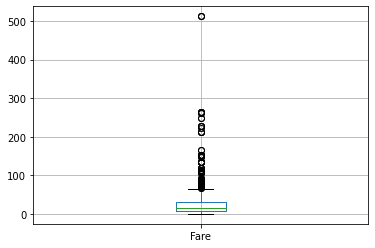

In [137]:
etit.boxplot(column = ['Fare'])

In [138]:
etit['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [139]:
IQR = etit['Fare'].quantile(0.75)-etit['Fare'].quantile(0.25)
print(IQR)

23.0896


In [140]:
UQuantile = etit['Fare'].quantile(0.75)+1.5*IQR
LQuantile = etit['Fare'].quantile(0.25)-1.5*IQR
print(UQuantile)
print(LQuantile)

65.6344
-26.724


In [141]:
Outliervalues = etit[(etit['Fare']>=UQuantile) | (etit['Fare']<=LQuantile)]
Outliervalues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28,8,2,CA. 2343,69.5500,S


In [142]:
index = etit[(etit['Fare']>=UQuantile) | (etit['Fare']<=LQuantile)].index
for i in index:
    etit['Fare'][i]=etit['Fare'].quantile(0.95)
    etit['Fare'].describe()

<ipython-input-142-010f3ebd2728>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etit['Fare'][i]=etit['Fare'].quantile(0.95)


In [143]:
etit['Fare'].describe()

count    891.000000
mean      30.131379
std       34.260377
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      112.677075
Name: Fare, dtype: float64

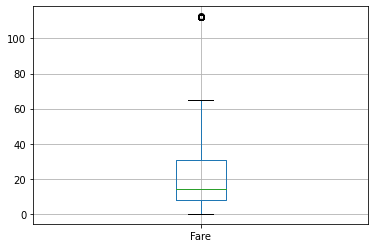

In [144]:
etit.boxplot(column = ['Fare'])

In [145]:
etit['Fare'].quantile(0.95)

112.37226195940798

In [146]:
eda = etit

In [147]:
obj = eda.dtypes == np.object
print(obj)

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age             True
SibSp          False
Parch          False
Ticket          True
Fare           False
Embarked        True
dtype: bool


In [148]:
eda.columns[obj]

Index(['Name', 'Sex', 'Age', 'Ticket', 'Embarked'], dtype='object')

In [149]:
del eda['Name']

In [150]:
obj = eda.dtypes == np.object
print(obj)

PassengerId    False
Survived       False
Pclass         False
Sex             True
Age             True
SibSp          False
Parch          False
Ticket          True
Fare           False
Embarked        True
dtype: bool


In [151]:
eda.columns[obj]

Index(['Sex', 'Age', 'Ticket', 'Embarked'], dtype='object')

In [152]:
dummydf = pd.DataFrame()
for i in eda.columns[obj]:
    dummy = pd.get_dummies(eda[i],drop_first = True)
    dummydf = pd.concat([dummydf,dummy], axis = 1)
print(dummydf)

     male  0.67  0.75  0.83  0.92  1.0  2.0  3.0  4.0  5.0  ...  W./C. 14258  \
0       1     0     0     0     0    0    0    0    0    0  ...            0   
1       0     0     0     0     0    0    0    0    0    0  ...            0   
2       0     0     0     0     0    0    0    0    0    0  ...            0   
3       0     0     0     0     0    0    0    0    0    0  ...            0   
4       1     0     0     0     0    0    0    0    0    0  ...            0   
..    ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...          ...   
886     1     0     0     0     0    0    0    0    0    0  ...            0   
887     0     0     0     0     0    0    0    0    0    0  ...            0   
888     0     0     0     0     0    0    0    0    0    0  ...            0   
889     1     0     0     0     0    0    0    0    0    0  ...            0   
890     1     0     0     0     0    0    0    0    0    0  ...            0   

     W./C. 14263  W./C. 6607  W./C. 660

In [153]:
eda1 = pd.concat([eda,dummydf], axis=1)

In [154]:
eda1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735,Q,S
0,1,0,3,male,22,1,0,A/5 21171,7.25000,S,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,female,38,1,0,PC 17599,112.07915,C,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.92500,S,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,female,35,1,0,113803,53.10000,S,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,male,35,0,0,373450,8.05000,S,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,211536,13.00000,S,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,female,19,0,0,112053,30.00000,S,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,female,28,1,2,W./C. 6607,23.45000,S,...,0,0,1,0,0,0,0,0,0,1
889,890,1,1,male,26,0,0,111369,30.00000,C,...,0,0,0,0,0,0,0,0,0,0


In [155]:
eda1.drop(['Sex', 'Age', 'Ticket', 'Embarked'],axis =1, inplace= True)

In [156]:
eda2 = pd.get_dummies(eda,drop_first=True)

In [157]:
eda2

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Age_0.67,Age_0.75,Age_0.83,...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.25000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,1,0,112.07915,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,0,0,7.92500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,1,0,53.10000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,0,0,8.05000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.00000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,0,0,30.00000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,1,2,23.45000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
889,890,1,1,0,0,30.00000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
## DECISION TREE


In [159]:
y=eda2.iloc[:,1].values

In [160]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [161]:
x=eda2.iloc[:,-775:].values

In [162]:
x

array([[3., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 1.],
       ...,
       [3., 1., 2., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 1., 0.]])

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)


In [165]:
 X_train.shape


(623, 775)

In [166]:
X_test.shape


(268, 775)

In [167]:
 y_train.shape


(623,)

In [168]:
 y_test.shape


(268,)

In [169]:
 from sklearn.tree import DecisionTreeClassifier 

In [170]:
clf = DecisionTreeClassifier() 
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
y_pred 

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [171]:
 from sklearn import metrics 

In [172]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2), "%")

Accuracy: 79.85 %


In [173]:
from sklearn.metrics import confusion_matrix 


In [174]:
 cm=confusion_matrix(y_test,y_pred) 

In [175]:
 cm 

array([[139,  29],
       [ 25,  75]], dtype=int64)